In [3]:
#エクセルファイルの変換を目指して
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import math

In [4]:
#ファイルの読み込み
file_name1 = 'B39 restraint R2'
file_name2 = 'B39 restraint R3'
file1 = pd.ExcelFile(file_name1+'.xlsx')
file2 = pd.ExcelFile(file_name2+'.xlsx')

sheet_df1 = file1.parse(file1.sheet_names, header=None)
sheet_df2 = file2.parse(file2.sheet_names, header=None)

#cmap = plt.get_cmap("tab20")

sheet_names1 = file1.sheet_names
sheet_names2 = file2.sheet_names


In [7]:
def inspect(time_leng, pattern_leng, top_print):
    #ファイル1のデータカウント
    pattern_dict1 = {}
    for i, name in enumerate(sheet_names1):
        sheet_df1[i] = file1.parse(name)
        end_number = (np.where(sheet_df1[i]['INFORMATION']=="CHANNEL")[0][1])
        sig1 = (sheet_df1[i]['Unnamed: 3'][24:end_number-5])
        leng = end_number - 5 -24 - time_leng
        psth = np.empty(leng, dtype=np.int)
        for k in range(leng) :
            psth[k] = sig1[k : k+time_leng].sum()
        for k in range(len(psth) - pattern_leng + 1) :
            if (str(psth[k : k+ pattern_leng]) in pattern_dict1) : 
                pattern_dict1[str(psth[k : k+ pattern_leng])] += 1
            else : 
                pattern_dict1[str(psth[k : k+ pattern_leng])] = 1

    
    #ファイル2のデータカウント
    pattern_dict2 = {}
    for i, name in enumerate(sheet_names2):
        sheet_df2[i] = file2.parse(name)
        end_number = (np.where(sheet_df2[i]['INFORMATION']=="CHANNEL")[0][1])
        sig1 = (sheet_df2[i]['Unnamed: 3'][24:end_number-5])
        leng = end_number - 5 -24 - time_leng
        psth = np.empty(leng, dtype=np.int)
        for k in range(leng) :
            psth[k] = sig1[k : k+time_leng].sum()
        for k in range(len(psth) - pattern_leng + 1) :
            if (str(psth[k : k+ pattern_leng]) in pattern_dict2) : 
                pattern_dict2[str(psth[k : k+ pattern_leng])] += 1
            else : 
                pattern_dict2[str(psth[k : k+ pattern_leng])] = 1


    #情報量の計算準備
    pattern_information =  0.0 
    sum_pattern1 = sum(pattern_dict1.values())
    sum_pattern2 = sum(pattern_dict2.values())
    pattern1 = len(pattern_dict1.keys())
    probability1 = np.zeros(pattern1, float)
    probability2 = np.zeros(pattern1, float)
    top_dict = {}
    k = 0
    for i in (pattern_dict1.keys()) :
        if (i in pattern_dict2) :
            probability1[k] = (pattern_dict1[i] / sum_pattern1)
            probability2[k] = (pattern_dict2[i] / sum_pattern2)
            pattern_information += probability1[k] * math.log2(probability1[k]/probability2[k])
            top_dict[i] = probability1[k] * math.log2(probability1[k]/probability2[k])
            k += 1

    if (k < top_print) :
        top_print = k
    #グラフ出力の準備
    print_probability1 = np.zeros(top_print, float)
    print_probability2 = np.zeros(top_print, float)
    print_pattern = []
    k = 0
    for i, v in sorted(top_dict.items(), key=lambda x:x[1])[0:top_print] :
        print_probability1[k] = (pattern_dict1[i] / sum_pattern1)
        print_probability2[k] = (pattern_dict2[i] / sum_pattern2)
        print_pattern.append(i)
        k += 1

    #グラフ出力
    fig = plt.figure(figsize=(10, 5), dpi=600)
    ax = fig.gca()
    plt.bar(print_pattern, print_probability2, color="red")
    plt.bar(print_pattern, print_probability1, color="blue")
    plt.xlim(-0.5, top_print-0.5)
    ax.set_xticklabels(print_pattern, rotation=90)
    plt.savefig("/st9/b009vb/seminar-graph/time-leng/" + str(time_leng) + ".png")
    plt.show()
    return pattern_information

In [2]:
parameter = 2
kullback = np.zeros(parameter, float)
for i in range(1, parameter+1):
    kullback[i-1] = inspect(i, 50, 20)

NameError: name 'np' is not defined

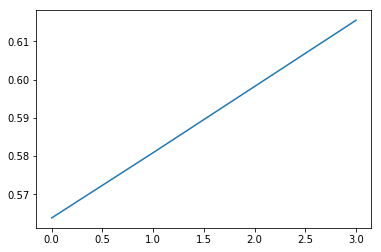

In [13]:
plt.plot(kullback)